# Feed Forward Deep Neural Network - More Examples

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hemendrarajawat/World-With-Deep-Learning/blob/master/notebooks/Feed%20Forward%20Network%202.ipynb)

Let's see some more examples of non-linear dataset and how we can easily predict the output with great accuracy.

## Import Libaries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(0)
my_cmap = LinearSegmentedColormap.from_list('', ['red', 'yellow', 'green'])

## Deep Neural Network Class

In [0]:
class FFSNNetwork:
  
  def __init__(self, n_inputs, hidden_sizes=[2]):
    np.random.seed(0)
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]
    
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      np.random.seed(0)
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = []
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss.append(mean_squared_error(Y_pred, Y))
    
    if display_loss:
      print('Min Loss:', loss[np.argmin(loss)])
      print('Loss after training:', loss[-1])
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

## Dataset 1 -> 2 Moons

### Generate Data

In [0]:
data, labels = make_moons(n_samples=1000, random_state=0, noise=0.2)

### Visualize the data

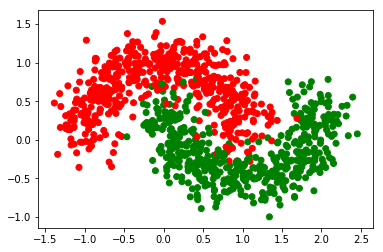

In [4]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

### Train - Test Split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.4, random_state=0, stratify=labels)

### Train Model


Min Loss: 0.023612157169074957
Loss after training: 0.023612157169074957


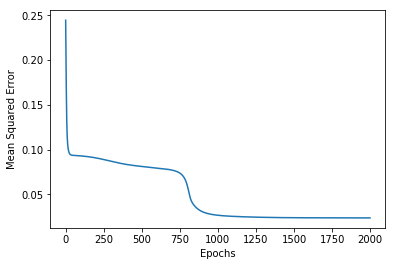

In [6]:
moons_model = FFSNNetwork(data.shape[1], hidden_sizes=[3])
moons_model.fit(X_train, Y_train, epochs=2000, learning_rate=0.01, display_loss=True)

### Evaluate the model

In [7]:
Y_pred_train = moons_model.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

Y_pred_val = moons_model.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.96


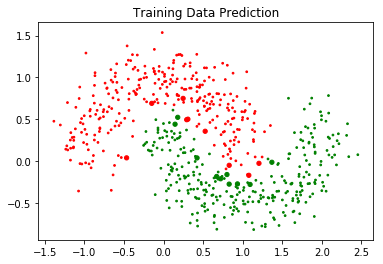

In [8]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.title('Training Data Prediction')
plt.show()

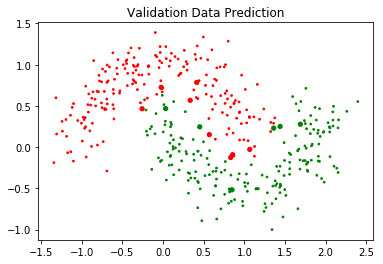

In [9]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred_binarised_val, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_val-Y_test)+.2))
plt.title('Validation Data Prediction')
plt.show()

## Dataset 2 -> Circles

### Generate Dataset

In [0]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.1, factor=0.6)

### Visualize the dataset

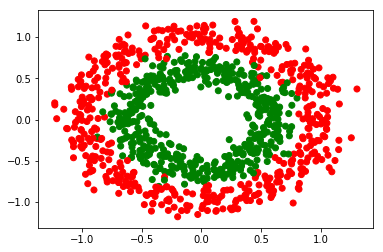

In [11]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

### Train - Test Split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0, test_size=0.35)

### Train Model


Min Loss: 0.01997353888427916
Loss after training: 0.01997353888427916


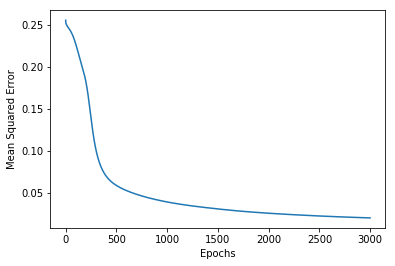

In [13]:
circle_model = FFSNNetwork(X_train.shape[1], hidden_sizes=[4])
circle_model.fit(X_train, Y_train, epochs=3000, learning_rate=0.005, display_loss=True)

### Validate the model

In [14]:
Y_pred_train = circle_model.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

Y_pred_val = circle_model.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.97


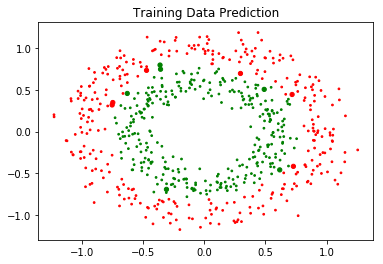

In [15]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.title('Training Data Prediction')
plt.show()

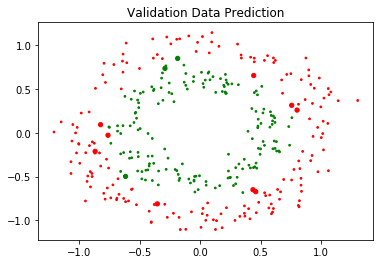

In [16]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred_binarised_val, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_val-Y_test)+.2))
plt.title('Validation Data Prediction')
plt.show()

## Conclusion

The above datasets were non-linear and we can see that with the help of Deep Neural Networks, we were able to predict the output accurately. 